In [492]:
import numpy as np
import matplotlib.pyplot as plt

def findInter(array1,array2):
    
    #intersections = np.argwhere(np.diff(np.sign(array1-array2)) != 0).reshape(-1) + 0
    
    intersecpart = np.argwhere(np.diff(np.sign(array1-array2)) != 0).reshape(-1) + 0
    
    return intersecpart

def PtfixeFoncX(alphabar,alpha,phi,i,deltal):

    x = (np.arange(10001)/10000.0)*2.5*np.pi
    
    
    l_1 = 0.5 + deltal
    l_2 = 0.5 - deltal

    # Pnts fixes intersection de ces deux equations

    # Il faut que cox(c) > i/2
    
    realindex = 0
    
    
    for index in range(len(x)):
        
        if np.absolute(np.cos(x[index-realindex])) < i/2.0:
            x = np.delete(x,index-realindex)
            
            realindex = realindex + 1 
            
    
    o = np.ones(len(x))
    
    LHS = alphabar*phi*o - (i*(l_2-l_1)/2.0)*o -2.0*alpha*x

    RHS = np.sin(x)*np.sqrt((o-(i**2.0)/(4.0*(np.cos(x)**2.0))))
    
    
    #LHS = (alphabar*phi*o - (i*(l_2-l_1)/2.0)*o -2.0*alpha*x)**2

    #RHS = (np.sin(x)**2)*((o-(i**2.0)/(4.0*(np.cos(x)**2.0))))
    
    

    return LHS,RHS,x


def PtfixeFoncY(alphabar,alpha,phi,i,deltal):

    y = (np.arange(10001)/10000.0)*2*np.pi

    

    l_1 = 0.5 + deltal
    l_2 = 0.5 - deltal

    # Pnts fixes intersection de ces deux equations

    # Il faut que cox(c) > i/2
    
    realindex = 0
    
    
    for index in range(len(y)):
        
        if np.absolute(np.sin(y[index-realindex])) < i/2.0:
            y = np.delete(y,index-realindex)
            
            realindex = realindex + 1 
            
    
    o = np.ones(len(y))
    
    LHS = alphabar*phi*o - (i*(l_2-l_1)/2.0)*o -2.0*alpha*np.arccos(i/(np.sin(y)*2.0))

    RHS = np.cos(y)*np.sqrt((o-(i**2.0)/(4.0*(np.sin(y)**2.0))))


    return LHS,RHS,y


def FindEigVect(ptFixeX,ptFixeY,eta,alpha):
    
    eingval = np.zeros((len(ptFixeY),4),dtype='complex')
    eingvect = np.zeros((len(ptFixeY)*4,4),dtype='complex')
    
    for pos in range(len(ptFixeX)):
        
        Jacobian = np.array([[0,0,1,0], 
                     [0,0,0,1],  
                     [-(np.cos(ptFixeX[pos])*np.cos(ptFixeY[pos]) + 2.0*alpha), 
                                      np.sin(ptFixeX[pos])*np.sin(ptFixeY[pos]), -eta,0],
                     [np.sin(ptFixeX[pos])*np.sin(ptFixeY[pos]),-(np.cos(ptFixeX[pos])*np.cos(ptFixeY[pos])), 0,-eta]])

        trace = -2.0*(np.cos(ptFixeX[pos])*np.cos(ptFixeY[pos]) + alpha)
        det = -(np.cos(ptFixeX[pos])*np.cos(ptFixeY[pos]) + 2.0*alpha)*-(np.cos(ptFixeX[pos])*np.cos(ptFixeY[pos])) - \
                np.sin(ptFixeX[pos])*np.sin(ptFixeY[pos])*np.sin(ptFixeX[pos])*np.sin(ptFixeY[pos])
            
        E1 = 1/2.0*(trace - np.sqrt(complex(trace**2 - 4.0*det)))
        E2 = 1/2.0*(trace + np.sqrt(complex(trace**2 - 4.0*det)))
        
        eingval[pos,0] = 1/2.0*(-eta + np.sqrt(complex(eta**2 + 4.0*E1)))
        eingval[pos,1] = 1/2.0*(-eta - np.sqrt(complex(eta**2 + 4.0*E1)))
        eingval[pos,2] = 1/2.0*(-eta + np.sqrt(complex(eta**2 + 4.0*E2)))
        eingval[pos,3] = 1/2.0*(-eta - np.sqrt(complex(eta**2 + 4.0*E2)))
        
        eingval[pos,:],eingvect[range(pos + 3*pos,pos + 3*pos +4 ),:] = np.linalg.eig(Jacobian)
        
    return eingvect,eingval

0.10989010989
0.32967032967
0.549450549451
0.769230769231
0.989010989011


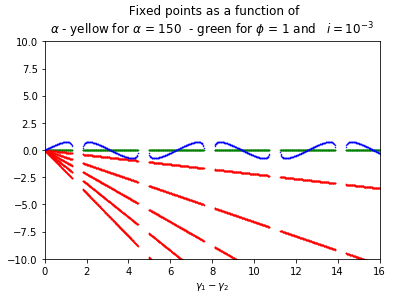

In [348]:
# Variables 

# i  = I/(2*I_01)   I_01 the critical current for both junctions

i = 0.5

#  phi  = phi_a/phi_0 with phi_0 the quantum flux

phi = 4

# alpha = phi_0/(I_01*L*2*PI),  L the total inductance 

alpha = 2

# alphabar = phi_0/(I_01*L)

alphabar = alpha*2*np.pi

# Omega  = sqrt(I_01*2*pi/(C_1*phi_0)) here C_1 is the capacitance for both junctions, we approcimate them to be the same
# we define tau = Omega*t

# eta = beta*2*np.sqrt(2*np.pi)/(I_01*C_1*phi_0) = beta*2*Omega/I_01. Here beta ( and thus eta) corresponds to loss.
# Since beta corresponds to a loss term and the rest is positive, eta is a positive constant.

eta = 0.5

# We define gamma_1 la phase pour la jonction 1 et gamma_2 la phase pour la deuxiéme jonction


# in function of i

phi = 4
alpha = 0.5
deltal = 0

plotnumber = 1


plt.figure(plotnumber)

phi = 0
i = 0.5
deltal = 0

LHS,RHS,x = PtfixeFonc(0,0,phi,i,deltal)

plt.plot(x,LHS,'g.',markersize=1.5)

for alpha in range(1,10,2):

    LHS,RHS,x = PtfixeFonc((alpha*2*np.pi)/9.1,alpha/9.1,phi,i,deltal)

    plt.plot(x,LHS,'r.',markersize=1.5)
    
    print((alpha/9.10))

LHS,RHS,x = PtfixeFonc(150*2*np.pi,150,phi,i,deltal)

plt.plot(x,LHS,'y.',markersize=1)

plt.plot(x,RHS,'b.',markersize=1)
#plt.axis([0, x.max()+1 ,LHS.min()*(1+0.5),LHS.max()*(1+0.5)])
plt.axis([0,16,-10,10])
plt.title(' Fixed points as a function of\n' r'$\alpha$ - yellow for $\alpha$ = 150  - green for $\phi$ = 1 and   $i = 10^{-3}$')
plt.xlabel(r'$\gamma_1 - \gamma_2$')
#plt.savefig('In function of alpha and phi=1_i=0,10-3_delta=0_zoom.pdf')
plt.show()


In [511]:
# Finding fixed points 

deltal  = 0
phi = 0 
eta = 0.2
i = 0.125

alpha = 0.1

def PtFixesXY(deltal,phi,i,alpha):

    LHS,RHS,x = PtfixeFoncX(alpha*2*np.pi,alpha,phi,i,deltal)
    
    ptFixeX= x[findInter(LHS,RHS)]

    realindex = 0
    index  = 0 
    
    #for index in range(len(ptFixeX)):
    #    if np.absolute(np.cos(ptFixeX[index-realindex])) < i/2.0:
    #        ptFixeX = np.delete(ptFixeX,index-realindex)
    #        realindex = realindex + 1 
            
    
    
    ptFixeY = np.arcsin(i/(2*np.cos(ptFixeX)))
    
    #plt.figure(3)

    #plt.plot(x,LHS,'y.',markersize=1)

    #plt.plot(x,RHS,'b.',markersize=1)
    #plt.axis([0, x.max()+1 ,LHS.min()*(1+0.5),LHS.max()*(1+0.5)])
    #plt.axis([0,16,-10,10])
    #plt.title(' Fixed points as a function of\n' r'$\alpha$ - yellow for $\alpha$ = 150  - green for $\phi$ = 1 and   $i = 10^{-3}$')
    #plt.xlabel(r'$\gamma_1 - \gamma_2$')
    #plt.savefig('In function of alpha and phi=1_i=0,10-3_delta=0_zoom.pdf')
    #plt.show()
    
    
    return ptFixeX,ptFixeY

def PtFixesYX(deltal,phi,i,alpha):

    LHS,RHS,y = PtfixeFoncY(alpha*2*np.pi,alpha,phi,i,deltal)

    ptFixeY= y[findInter(LHS,RHS)]

    ptFixeX = np.arccos(i/(2*np.sin(ptFixeY)))
    
    #plt.figure(2)

    #plt.plot(y,LHS,'y.',markersize=1)

    #plt.plot(y,RHS,'b.',markersize=1)
    #plt.axis([0, x.max()+1 ,LHS.min()*(1+0.5),LHS.max()*(1+0.5)])
    #plt.axis([0,16,-10,10])
    #plt.title(' Fixed points as a function of\n' r'$\alpha$ - yellow for $\alpha$ = 150  - green for $\phi$ = 1 and   $i = 10^{-3}$')
    #plt.xlabel(r'$\gamma_1 - \gamma_2$')
    #plt.savefig('In function of alpha and phi=1_i=0,10-3_delta=0_zoom.pdf')
    #plt.show()
    
    return ptFixeX,ptFixeY


def solSysteme(deltal,phi,eta,i,alpha):

    # find the fixed points
    
    ptFixeX1,ptFixeY1 = PtFixesXY(deltal,phi,i,alpha)

    ptFixeX2,ptFixeY2 = PtFixesYX(deltal,phi,i,alpha)
    
    # find the eingenvalues and vectors
    
    eingvect1,eingvalue1 = FindEigVect(ptFixeX1,ptFixeY1,eta,alpha)
    eingvect2,eingvalue2 = FindEigVect(ptFixeX2,ptFixeY2,eta,alpha)

    #print(ptFixeX1)
    #print(ptFixeY1)
    #print(eingvect1,eingvalue1)

    #print(ptFixeX2)
    #print(ptFixeY2)
    #print(eingvect2,eingvalue2)
    
    
    return ptFixeX1,ptFixeY1,ptFixeX2,ptFixeY2,eingvect1,eingvalue1,eingvect2,eingvalue2
    

In [510]:
deltal  = 0
phi = 0 
eta = 0.2
i = 0.125

alpha = 0.1

ptFixeX1,ptFixeY1,ptFixeX2,ptFixeY2,eingvect1,eingvalue1,eingvect2,eingvalue2 = solSysteme(deltal,phi,eta,i,alpha):
    


SyntaxError: invalid syntax (<ipython-input-510-0331a7e84ae3>, line 8)